<a href="https://colab.research.google.com/github/amitagar1/EVA2.0/blob/master/Session4_Assignement_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries and modules**

In [0]:
#Installing Keras Package
# https://keras.io/
#!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
#Installing Depenendcies to Run Classification Problem on MNIST dataset
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


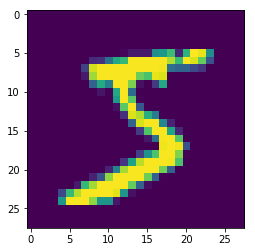

In [0]:
# Printing the dimensions of training dataset and displaying 1st Image in Dataset
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
# Changing the dimension of the Images from 2D to 3D
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
# First Making datatype to float type and then Normalizing the pixel value
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:

Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

# 1. Plain Vanila Model With Max Pooling, Epochs =10

In [0]:
# Defining the model architecture 
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(10, 3, activation='relu', input_shape=(28,28,1))) #26
model.add(Convolution2D(16, 3, activation='relu')) #24
model.add(Convolution2D(16, 3, activation='relu')) #22

model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Convolution2D(16, 3, activation='relu')) #9
model.add(Convolution2D(10, 1, activation='relu'))#9
model.add(Convolution2D(10, 9)) #1

model.add(Flatten())
model.add(Activation('softmax'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 24, 24, 16)        1456      
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 22, 22, 16)        2320      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 9, 9, 16)          2320      
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 9, 9, 10)          170       
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 1, 1, 10)          8110      
__________

In [0]:
# Defining parameters for Optimizer function
#adam = keras.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1, validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 189us/step - loss: 0.1794 - acc: 0.9450 - val_loss: 0.0715 - val_acc: 0.9775
Epoch 2/10
60000/60000 [==============================] - 11s 178us/step - loss: 0.0629 - acc: 0.9811 - val_loss: 0.0507 - val_acc: 0.9832
Epoch 3/10
60000/60000 [==============================] - 11s 178us/step - loss: 0.0468 - acc: 0.9856 - val_loss: 0.0438 - val_acc: 0.9870
Epoch 4/10
60000/60000 [==============================] - 11s 181us/step - loss: 0.0376 - acc: 0.9879 - val_loss: 0.0339 - val_acc: 0.9887
Epoch 5/10
60000/60000 [==============================] - 11s 179us/step - loss: 0.0309 - acc: 0.9903 - val_loss: 0.0394 - val_acc: 0.9873
Epoch 6/10
60000/60000 [==============================] - 11s 178us/step - loss: 0.0269 - acc: 0.9912 - val_loss: 0.0309 - val_acc: 0.9896
Epoch 7/10
60000/60000 [==============================] - 11s 177us/step - loss: 0.0234 - acc: 0.9922 - val_loss: 0.

In [0]:
# Validating the model on Validation data set
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.030186846296573276, 0.9922]


#Results:
##This model resulted .9950 training accuracy and .9922 validation accuracy. Slightly Overfitting model so ther is scope to improve validation accuracy through other techniques**

#2. Model with Batch Normalization, Epochs =10

In [0]:
from keras.layers import BatchNormalization

In [0]:
# Defining the model architecture 
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(10, 3, activation='relu', input_shape=(28,28,1))) #26
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, activation='relu')) #24
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, activation='relu')) #22
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Convolution2D(16, 3, activation='relu')) #9
model.add(BatchNormalization())

model.add(Convolution2D(10, 1, activation='relu'))#9
model.add(BatchNormalization())
model.add(Convolution2D(10, 9)) #1

model.add(Flatten())
model.add(Activation('softmax'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_5 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_6 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 22, 22, 16)        2320      
_________________________________________________________________
batch_normalization_7 (Batch (None, 22, 22, 16)        64        
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 11, 11, 16)        0         
__________

In [0]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch= 10, verbose=1, validation_data= (X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 19s 324us/step - loss: 0.1204 - acc: 0.9633 - val_loss: 0.0505 - val_acc: 0.9835
Epoch 2/10
60000/60000 [==============================] - 18s 302us/step - loss: 0.0464 - acc: 0.9853 - val_loss: 0.0388 - val_acc: 0.9870
Epoch 3/10
60000/60000 [==============================] - 18s 300us/step - loss: 0.0353 - acc: 0.9887 - val_loss: 0.0438 - val_acc: 0.9878
Epoch 4/10
60000/60000 [==============================] - 18s 300us/step - loss: 0.0299 - acc: 0.9906 - val_loss: 0.0321 - val_acc: 0.9900
Epoch 5/10
60000/60000 [==============================] - 18s 297us/step - loss: 0.0231 - acc: 0.9920 - val_loss: 0.0384 - val_acc: 0.9899
Epoch 6/10
60000/60000 [==============================] - 18s 299us/step - loss: 0.0200 - acc: 0.9933 - val_loss: 0.0398 - val_acc: 0.9882
Epoch 7/10
60000/60000 [==============================] - 18s 301us/step - loss: 0.0179 - acc: 0.9940 - val_loss: 0.

### Results:
### This model resulted .9957 training accuracy, improvement from 1st model however validation accuracy fall to .9905. This model lead to overfitting so further scope to improve validation accuracy through regularisation techniques

# 3. Model with Regularisation Techniques (DropOut), Epochs=10

In [0]:
# Defining the model architecture 
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(10, 3, activation='relu', input_shape=(28,28,1))) #26
model.add(BatchNormalization())


model.add(Convolution2D(16, 3, activation='relu')) #24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, activation='relu')) #22
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Convolution2D(16, 3, activation='relu')) #9
model.add(BatchNormalization())


model.add(Convolution2D(10, 1, activation='relu'))#9
model.add(BatchNormalization())

model.add(Convolution2D(10, 9)) #1


model.add(Flatten())
model.add(Activation('softmax'))

In [0]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_80 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_26 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_27 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_15 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 22, 22, 16)        2320      
_________________________________________________________________
batch_normalization_28 (Batc (None, 22, 22, 16)        64        
__________

In [0]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1, validation_data=(X_test, Y_test) )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 22s 359us/step - loss: 0.1263 - acc: 0.9611 - val_loss: 0.0435 - val_acc: 0.9857
Epoch 2/10
60000/60000 [==============================] - 19s 316us/step - loss: 0.0490 - acc: 0.9848 - val_loss: 0.0396 - val_acc: 0.9869
Epoch 3/10
60000/60000 [==============================] - 19s 318us/step - loss: 0.0376 - acc: 0.9879 - val_loss: 0.0346 - val_acc: 0.9890
Epoch 4/10
60000/60000 [==============================] - 20s 325us/step - loss: 0.0308 - acc: 0.9900 - val_loss: 0.0320 - val_acc: 0.9885
Epoch 5/10
60000/60000 [==============================] - 19s 317us/step - loss: 0.0273 - acc: 0.9911 - val_loss: 0.0386 - val_acc: 0.9885
Epoch 6/10
60000/60000 [==============================] - 19s 318us/step - loss: 0.0245 - acc: 0.9917 - val_loss: 0.0326 - val_acc: 0.9907
Epoch 7/10
60000/60000 [==============================] - 19s 318us/step - loss: 0.0205 - acc: 0.9932 - val_loss: 0.

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch= 10, verbose=1, validation_data= (X_test, Y_test))

## Results
### The training accuracy remains at .9950 and validation accuracy improved little bit to .9918. Still we can improve the model through other regularization techniques (Learning Rate)
## Learnings
### The training accuracy drop if we use dropouts near to the final layer. 

# 4. Improving model through introducing learning rates and tweaking with batch size

In [0]:
# Defining the model architecture 
from keras.layers import Activation
model = Sequential()
 

model.add(Convolution2D(10, 3, activation='relu', input_shape=(28,28,1))) #26


model.add(BatchNormalization())
model.add(Convolution2D(16, 3, activation='relu')) #24

model.add(Dropout(0.1))

model.add(BatchNormalization())
model.add(Convolution2D(16, 3, activation='relu')) #22
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(BatchNormalization())
model.add(Convolution2D(16, 3, activation='relu')) #9
model.add(Dropout(0.1))


model.add(BatchNormalization())
model.add(Convolution2D(10, 1, activation='relu'))#9

model.add(BatchNormalization())
model.add(Convolution2D(10, 9)) #1


model.add(Flatten())
model.add(Activation('softmax'))

In [132]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_189 (Conv2D)          (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_112 (Bat (None, 26, 26, 10)        40        
_________________________________________________________________
conv2d_190 (Conv2D)          (None, 24, 24, 16)        1456      
_________________________________________________________________
dropout_52 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
batch_normalization_113 (Bat (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_191 (Conv2D)          (None, 22, 22, 16)        2320      
_________________________________________________________________
dropout_53 (Dropout)         (None, 22, 22, 16)        0         
__________

In [0]:
# Defining parameters for Optimizer function
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [133]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 16s 272us/step - loss: 0.1353 - acc: 0.9576 - val_loss: 0.0467 - val_acc: 0.9840
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 6s 105us/step - loss: 0.0484 - acc: 0.9854 - val_loss: 0.0420 - val_acc: 0.9866
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 6s 103us/step - loss: 0.0364 - acc: 0.9885 - val_loss: 0.0366 - val_acc: 0.9874
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 6s 103us/step - loss: 0.0311 - acc: 0.9905 - val_loss: 0.0283 - val_acc: 0.9912
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [=====

## Results
##Training accuracy increasd to .9973 and validation accuracy to .9924